# Imports

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# set parameters

In [28]:
dim = 1

# load data

In [29]:
data = pd.read_csv('salary_data.csv')

# data description and data visualization

In [30]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [31]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [32]:
x = data['YearsExperience']
y = data['Salary']
x = np.array(x)
x = x.reshape(len(x),dim)

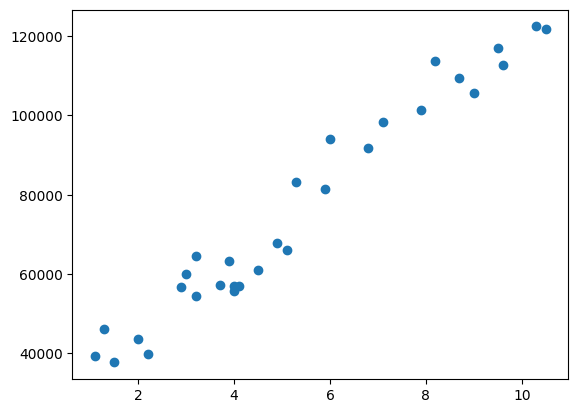

In [33]:
plt.scatter(x,y)

In [34]:
# function to intialize the weights and bias randomly
def initialize(dim,zeros=False):
    if(zeros):
        b = 0
        w = np.zeros(dim)
    
    else:
        b = np.random.random()
        w = np.random.rand(dim)
    return b, w

In [36]:
def predict(x,w,b):
    return x*w+b

In [37]:
# function to predict the output
def predict_y(x,w,b):
    return b + np.dot(x,w)


In [38]:
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [39]:
def compute_gradient(x,y,w,b):
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        dj_db += w * x[i] + b - y[i] 
        dj_dw += (w * x[i] + b - y[i]) * x[i] 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m
    # d_w = d_w / n
    # d_b = d_b /  n
    return dj_dw, dj_db

In [40]:
def gradient_descent(x,y,w_in,b_in,iter,lr):
    w = w_in
    b = b_in
    j_history = []
    for i in range(iter): 
        d_w, d_b = compute_gradient(x,y,w,b)
        w = w - lr * d_w
        b = b - lr * d_b
        j_history.append(compute_cost(x,y,w,b))
    return w,b,j_history

In [41]:
iterations = 10000
w,b,j = gradient_descent(x,y,w_in=5000,b_in=0,iter=iterations,lr=0.001)

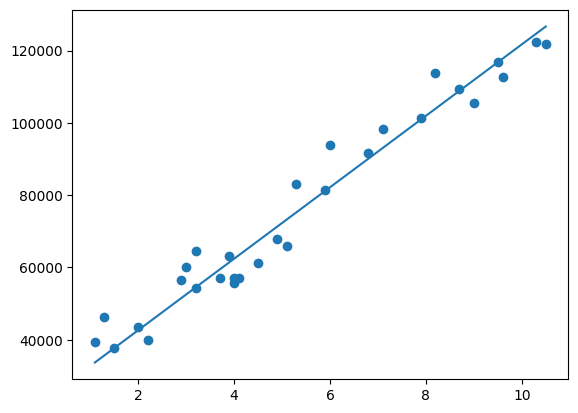

In [42]:
plt.scatter(x,y)
plt.plot(x,predict_y(x,w,b))

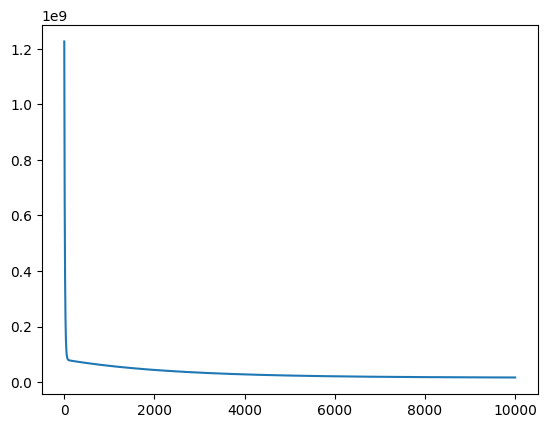

In [44]:

plt.plot(list(range(iterations)),j)